# [비지도 학습]

## 2. 밀도 기반 군집 분석 (DBSCAN)

- Density-Based Spatial Clustering of Applications with Noise

## 3. 주성분 분석 (PCA)

- Principal Component Analysis

In [1]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN # 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA # 주성분 분석

In [2]:
# 데이터 불러오기
X = pd.read_csv('./data/credit card.csv')
X = X.drop("CUST_ID", axis=1) # CUST_ID 컬럼 삭제
X.fillna(method="ffill", inplace=True) # method="ffill" -> 앞의 값으로 결측치가 채워짐
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [3]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
X

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,48.886365,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
# 데이터 전처리 및 데이터를 2차원으로 차원 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # 평균이 0, 표준편차가 1이 되도록 데이터 크기 조정

X_normalized = normalize(X_scaled) # 데이터가, 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized) # 넘파이 배열을 DataFrame으로 변환

pca = PCA(n_components=2) # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized) # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
X_principal.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519098,0.544828
2,0.330633,0.268879
3,-0.481657,-0.097611
4,-0.563512,-0.482505


In [6]:
scaler

StandardScaler()

In [7]:
X_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3053336 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08714014,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10010994,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32935392,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34057185,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32688396,
        -0.52555097, -4.12276757]])

In [8]:
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.146906,0.103137,-0.066350,-0.071056,-0.026406,-0.092925,0.252792,-0.135103,0.234873,-0.134444,-0.094773,-0.069757,-0.191193,-0.096793,-0.068374,0.235693,-0.820733
8946,-0.151150,0.105477,-0.067009,-0.072668,-0.025006,-0.095033,0.258527,-0.138169,0.240202,-0.137494,-0.096923,-0.071340,-0.195531,-0.102486,-0.069925,-0.106997,-0.839354
8947,-0.156989,-0.039327,-0.085230,-0.075682,-0.062527,-0.098974,0.181198,-0.143898,0.161244,-0.143196,-0.100942,-0.082828,-0.203640,-0.120989,-0.069834,0.069801,-0.874162
8948,-0.154334,-0.038414,-0.097250,-0.073925,-0.094148,-0.093066,-0.253040,-0.140558,-0.189920,0.032626,-0.037901,-0.122568,-0.227375,-0.120236,-0.070536,0.068181,-0.853872


In [9]:
pca

PCA(n_components=2)

In [10]:
X_principal

,P1,P2
0,-0.489949,-0.679976
1,-0.519098,0.544828
2,0.330633,0.268879
3,-0.481657,-0.097611
4,-0.563512,-0.482505
...,...,...
8945,0.328693,-0.198293
8946,0.259752,-0.176867
8947,0.188818,-0.248155
8948,-0.313093,-0.171112


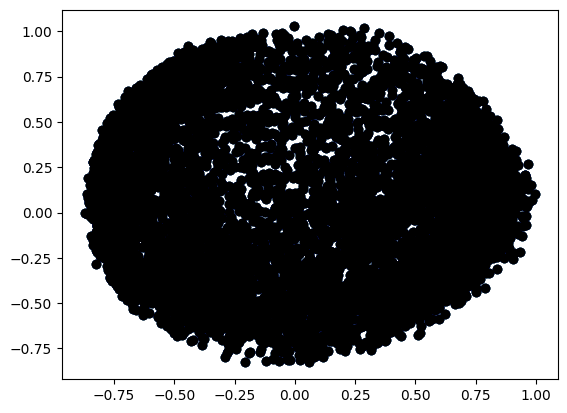

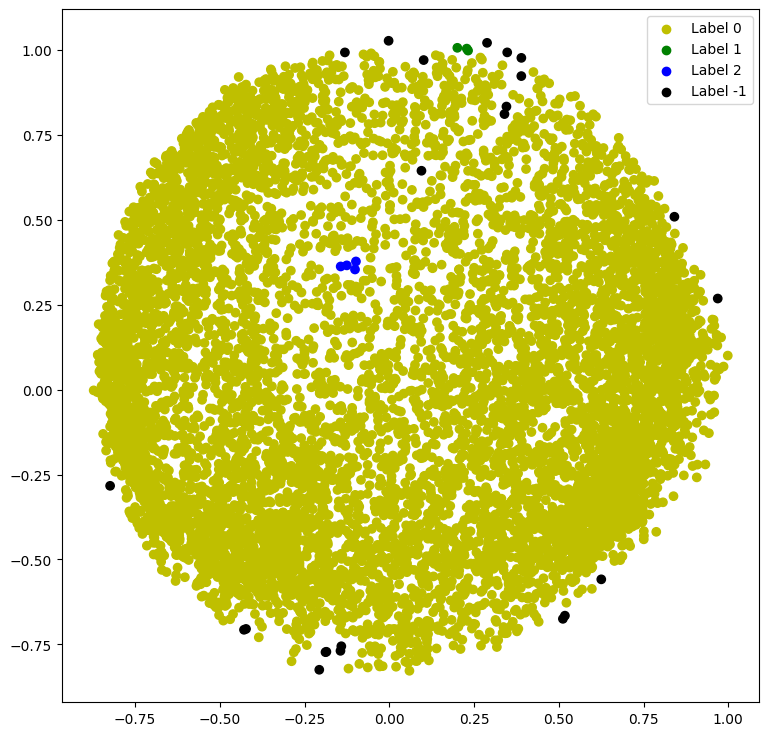

In [11]:
# DBSCAN 모델 생성 및 결과의 시각화
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal) # 밀집 기반 군집 분석 모델 생성 및 훈련
labels = db_default.labels_ # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 저장

colours = {} # 출력 그래프의 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels] # 각 데이터 포인트에 대한 색상 벡터 생성
# 플롯의 범례(legend) 구성
r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec) # 정의된 색상 벡터에 따라 x축에 P1, y축에 P2 플로팅

plt.legend( (r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1') ) # 범례 구축
plt.show()

In [12]:
db_default

DBSCAN(eps=0.0375, min_samples=3)

In [13]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
len(cvec)

8950

In [15]:
from collections import Counter
Counter(cvec)

Counter({'y': 8920, 'g': 3, 'k': 23, 'b': 4})

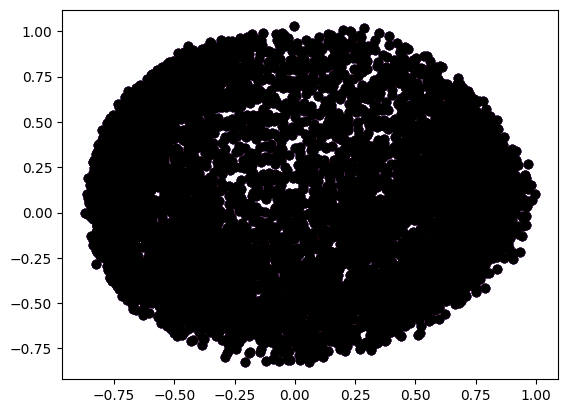

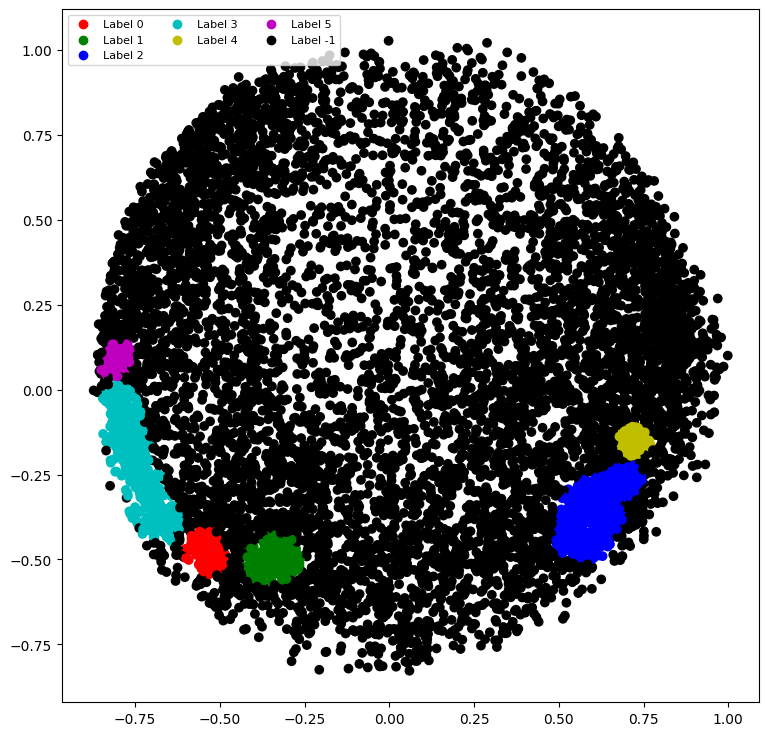

In [16]:
# 모델 튜닝 # min_samples=50으로 수정
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal) # 밀집 기반 군집 분석 모델 생성 및 훈련
labels1 = db.labels_ # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 저장

colours1 = {} # 출력 그래프의 색상을 위한 레이블 생성
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1] # 각 데이터 포인트에 대한 색상 벡터 생성
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
# 플롯의 범례(legend) 구성
r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[-1])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec) # 정의된 색상 벡터에 따라 x축에 P1, y축에 P2 플로팅

plt.legend( (r, g, b, c, y, m, k),
            ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), # 범례 구축
            scatterpoints=1,
            loc='upper left',
            ncol=3,
            fontsize=8
           )
plt.show()

In [17]:
from collections import Counter
Counter(cvec)

Counter({'k': 7218, 'r': 134, 'b': 564, 'g': 217, 'c': 646, 'm': 88, 'y': 83})

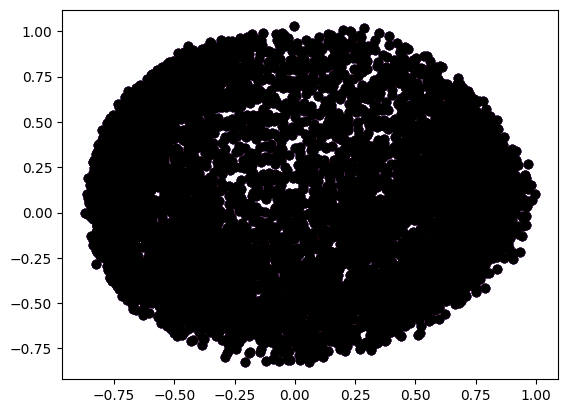

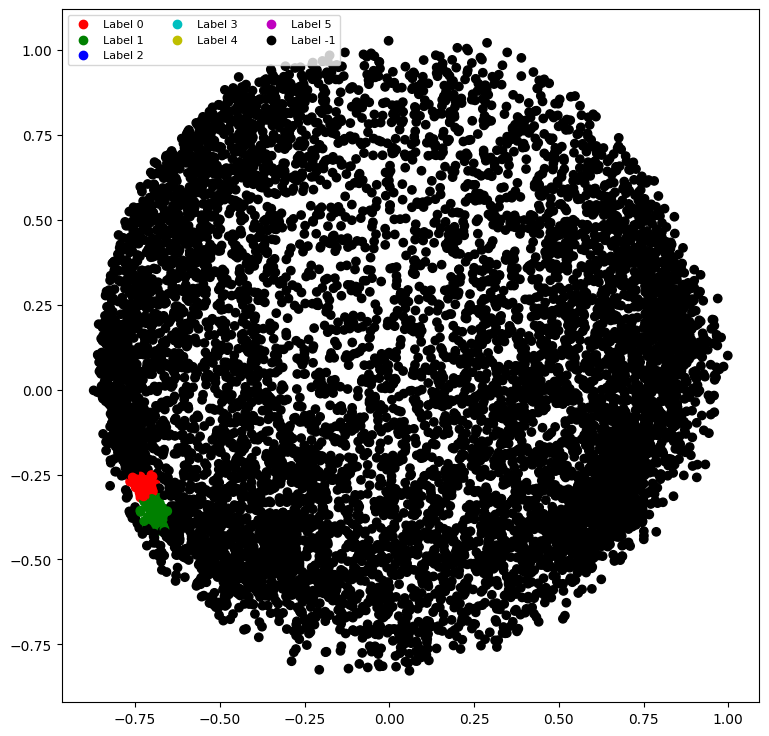

In [18]:
# 모델 튜닝 # min_samples=100으로 수정
db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal) # 밀집 기반 군집 분석 모델 생성 및 훈련
labels1 = db.labels_ # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 저장

colours1 = {} # 출력 그래프의 색상을 위한 레이블 생성
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1] # 각 데이터 포인트에 대한 색상 벡터 생성
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']
# 플롯의 범례(legend) 구성
r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colors1[-1])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec) # 정의된 색상 벡터에 따라 x축에 P1, y축에 P2 플로팅

plt.legend( (r, g, b, c, y, m, k),
            ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), # 범례 구축
            scatterpoints=1,
            loc='upper left',
            ncol=3,
            fontsize=8
           )
plt.show()

In [19]:
from collections import Counter
Counter(cvec)

Counter({'k': 8698, 'r': 111, 'g': 141})